#### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Libraries

In [1]:
import ipywidgets as widgets
from IPython.display import display

# Dataframe/numerical libraries'
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Pre-processing
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve

#### Exploratory Data Analysis

In [2]:
# Read dataset
diabetes = pd.read_csv(r'C:\Users\Murillo\Desktop\Python\Portifolio\Diabetes\diabetes.csv', sep=',')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.duplicated().sum()

0

In [6]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- We can notice that have many null values as zeros. We'll convert to null values and impute it.

In [7]:
# Converting the zeros values into null values.
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [8]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# Impute values with mean and median.
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace = True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace = True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(), inplace = True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(), inplace = True)
diabetes['BMI'].fillna(diabetes['BMI'].mean(), inplace = True)

In [10]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


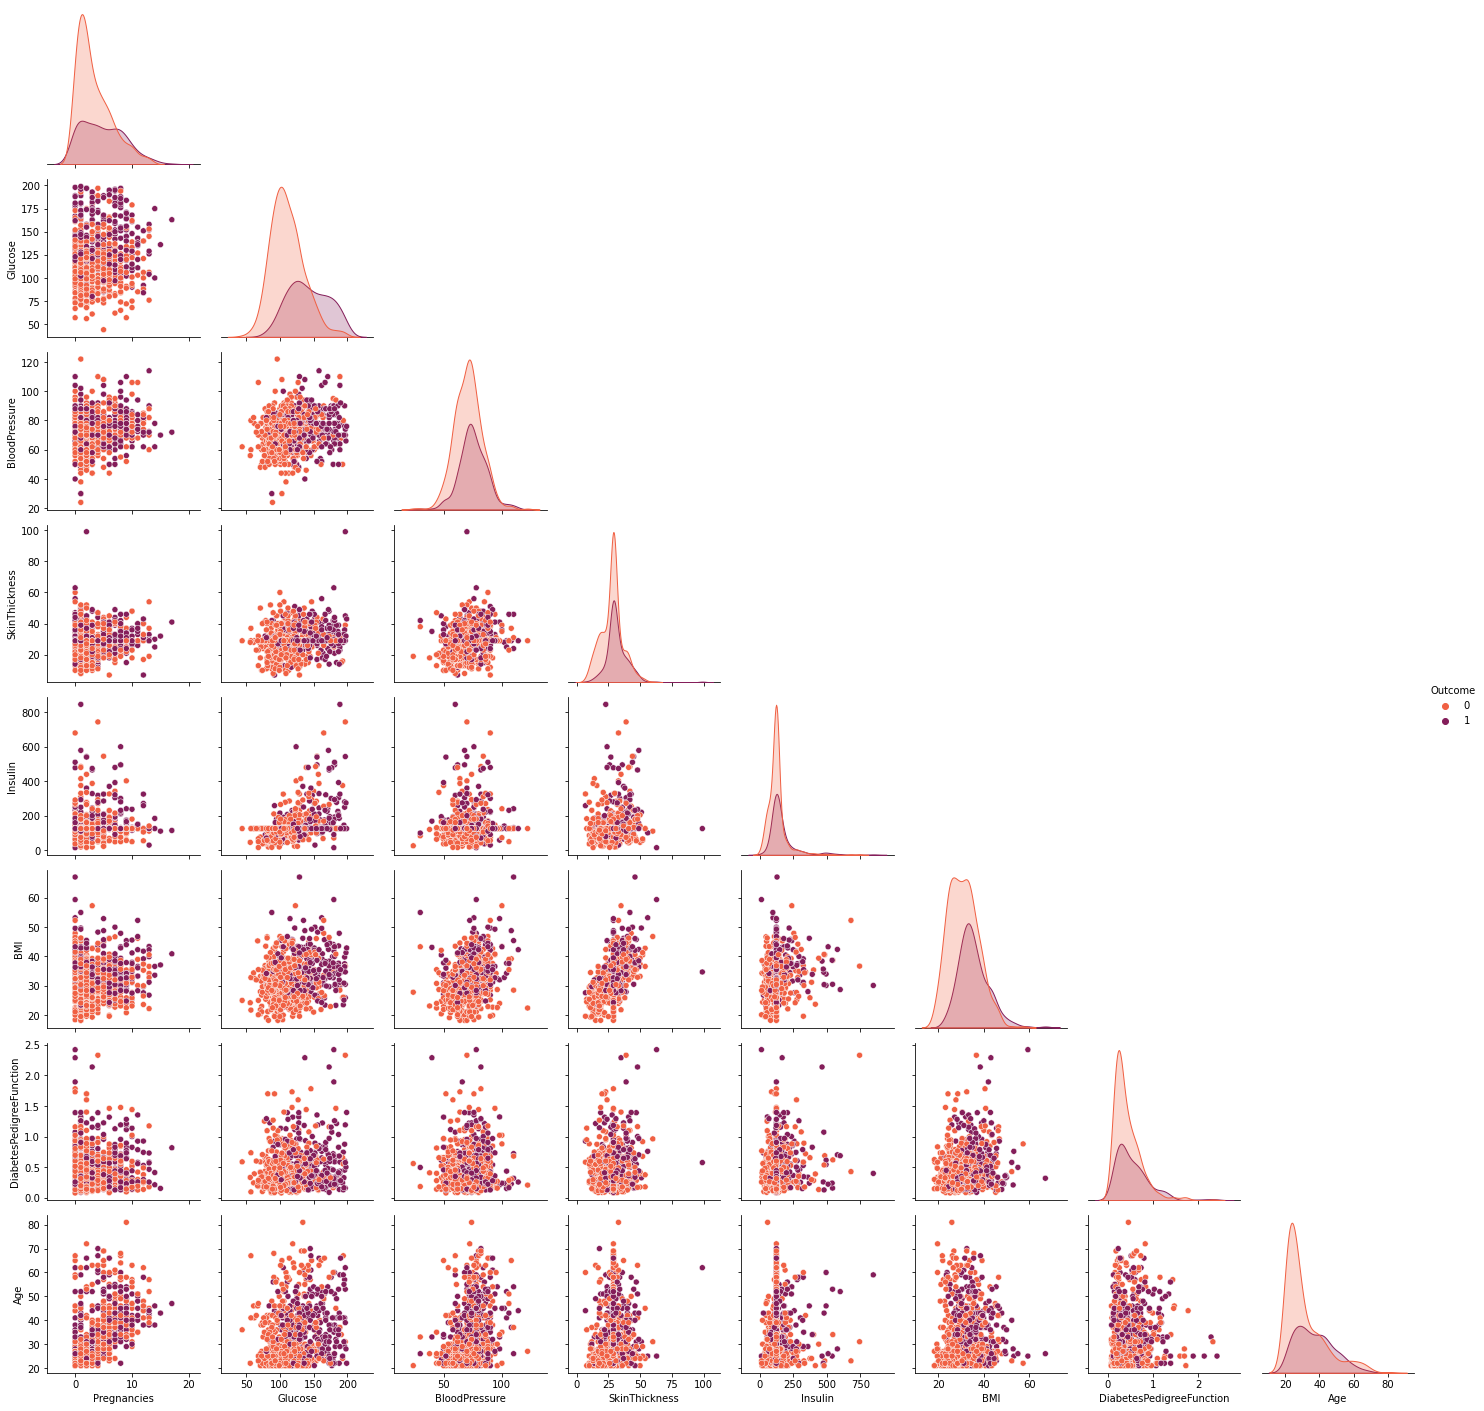

In [11]:
pair = sns.PairGrid(diabetes, hue="Outcome", palette="rocket_r", diag_sharey=False, corner=True)
pair.map_lower(sns.scatterplot)
pair.map_diag(sns.kdeplot, fill=True)
pair.add_legend();

In [12]:
X = diabetes.iloc[:, 0:-1]
y = diabetes.iloc[:, -1]

In [13]:
# Spliting features and target in training and testing samples.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [14]:
y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

In [15]:
# Preprocessing
scaler = StandardScaler()

#### Models

In [16]:
logreg = LogisticRegression(solver='liblinear')
tree = DecisionTreeClassifier()
random = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()
gbt = GradientBoostingClassifier()
naive = GaussianNB()

models = [logreg, tree, random, knn, svc, gbt, naive]

In [17]:
def accuracy(X_train, X_test, models):
  name = []
  results = []
  for i in models:
    name.append(str(i))
    pipe = make_pipeline(scaler, i)
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    results.append(accuracy)
    df = pd.DataFrame({'Model':name, 'Accuracy':results})
  return df
  
accuracy(X_train, X_test, models)

,Model,Accuracy
0,LogisticRegression(solver='liblinear'),0.772727
1,DecisionTreeClassifier(),0.681818
2,RandomForestClassifier(),0.772727
3,KNeighborsClassifier(),0.746753
4,SVC(),0.772727
5,GradientBoostingClassifier(),0.798701
6,GaussianNB(),0.759740


#### Accuracy

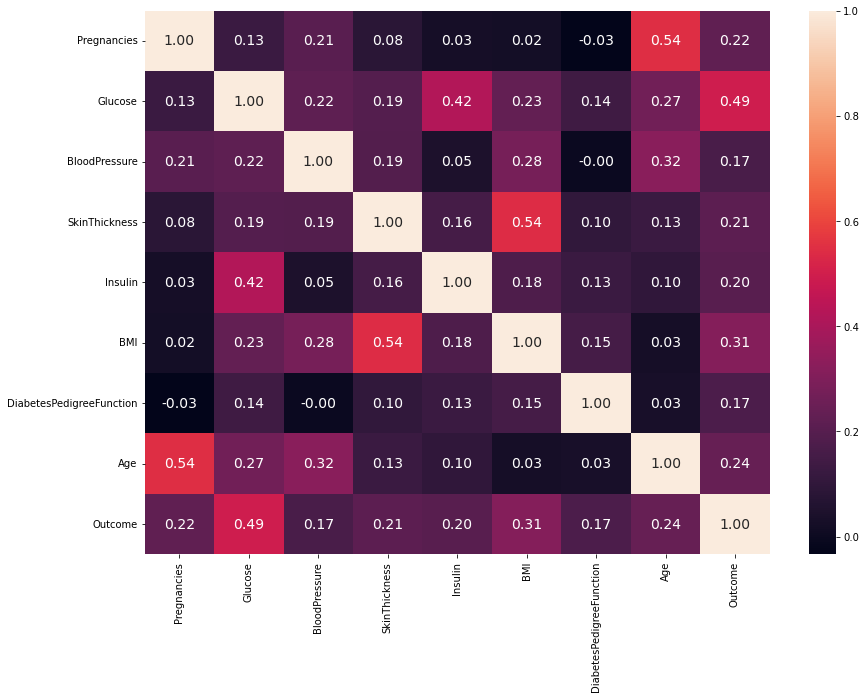

In [18]:
def accuracy(X_train, X_test, models):
  name = []
  results = []
  for i in models:
    name.append(str(i))
    pipe = make_pipeline(scaler, i)
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    results.append(accuracy)
    df = pd.DataFrame({'Model':name, 'Accuracy':results})
  return df

In [ ]:
accuracy(X_train,X_test, models)

#### Correlation

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(diabetes.corr(), annot=True, fmt='.2f', annot_kws={'fontsize':14})
plt.show();

#### Selecting New Features

In [19]:
X_select = diabetes[['Pregnancies', 'Glucose', 'BMI', 'Age']]
X_train_select, X_test_select, y_train, y_test = train_test_split(X_select, y, test_size=0.2, random_state=0, stratify=y)

#### New Accuracy

In [20]:
accuracy(X_train_select, X_test_select, models)

,Model,Accuracy
0,LogisticRegression(solver='liblinear'),0.759740
1,DecisionTreeClassifier(),0.681818
2,RandomForestClassifier(),0.785714
3,KNeighborsClassifier(),0.772727
4,SVC(),0.785714
5,GradientBoostingClassifier(),0.811688
6,GaussianNB(),0.753247


#### ROC AUC

In [21]:
pipe_rand = make_pipeline(scaler, random)
pipe_rand.fit(X_train_select, y_train)
y_rand_proba = pipe_rand.predict_proba(X_test_select)
roc_auc_score(y_test, y_rand_proba[:,1])

0.8379629629629628

In [22]:
pipe_gbt = make_pipeline(scaler, gbt)
pipe_gbt.fit(X_train_select, y_train)
y_gbt_proba = pipe_gbt.predict_proba(X_test_select)
roc_auc_score(y_test, y_gbt_proba[:,1])

0.8781481481481482

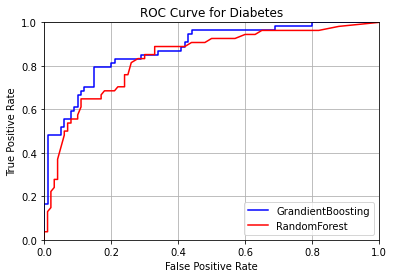

In [23]:
# instantiating the roc_cruve
fpr_gbt,tpr_gbt,threshols_gbt=roc_curve(y_test,y_gbt_proba[:,1])
fpr_rand,tpr_rand,threshols_rand=roc_curve(y_test,y_rand_proba[:,1])
# plotting the curve
plt.plot(fpr_gbt,tpr_gbt, color='blue', label='GrandientBoosting')
plt.plot(fpr_rand,tpr_rand, color='red', label='RandomForest')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Diabetes")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Confusion Matrix

In [ ]:
pipe = make_pipeline(scaler, gbt)
pipe.fit(X_train_select, y_train)
y_predict_gbt = pipe.predict(X_test_select)

confusion_matrix(y_test, y_predict_gbt)

In [ ]:
recall_score(y_test, y_predict_gbt)

In [ ]:
90/float(90+10)

In [ ]:
precision_score(y_test, y_predict_gbt)

#### Adjusting threshold

In [ ]:
plt.hist(y_gbt_proba[:,1], bins=10)
plt.xlim(0,1)
plt.show

In [ ]:
def threshold(threshold_select=0.5):
  print('Sensitivity:',tpr_gbt[threshols_gbt>threshold_select][-1])
  print('Specificity:', 1-fpr_gbt[threshols_gbt>threshold_select][-1])

In [ ]:
widgets.interact(threshold, threshold_select=(0, 1, 0.01));

In [ ]:
y_pred_class = binarize(y_gbt_proba, threshold=0.25)

In [ ]:
y_gbt_proba[0:5]

In [ ]:
y_pred_class[0:5]

In [ ]:
# Confusion Matrix (threshold = 0.25)
confusion_matrix(y_test, y_pred_class[:,1])

In [ ]:
recall_score(y_test, y_pred_class[:,1])

In [ ]:
78/float(100)

In [ ]:
precision_score(y_test, y_pred_class[:,1])

#### Conclusion

In this analysis, comparing the accuracies and the ROC curve we determined that **GradientBoostingClassifier** was the best model to predicted diabetes, with a accuracy of **81,2%**. We had the best result using 'Pregnancies', 'Glucose', 'BMI' and 'Age' as the features for the model.
Looking the Sensitivity(True Positive Rate) and the Specificity(True Negative Rate) we could conclude that the default threshold is not the best for our proposal, as we want a higher probability to predicted diabetes (Outcome=1). So we adjust the threshold to 0,25 for improve the Sensitivity.